# What is forecasting ?

[Accéder à la formation et aux nb + données](https://olympus.mygreatlearning.com/courses/51645)
Certaines données ne sont pas fournies. Du coup, impossible d'avoir les résultats de la formation. On peut simplement regarder la formation.

Il s'agit de commencer par regarder l'ensemble des données, puis de regarder le comportement des variables pour chaque Etat (nombre de décès etc). Cette première analyse univariée via des graphiques permettra de comparer les Etats entre eux.

on utilise surtout la régression linéaire pour prédire des observations futures.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [4]:
covid = pd.read_csv('.\\DONNEES\\covid_19_india (1).csv',
                    parse_dates=['Date'], ## indiquer que Date est une date
                    dayfirst=True)

C:\Users\will\AppData\Local\Temp\ipykernel_23352\1512274066.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  covid = pd.read_csv('.\\DONNEES\\covid_19_india (1).csv',


In [5]:
covid.head()
## Time : date de collecte

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [6]:
covid = covid[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]

covid.columns = ['date','state','cured','deaths','confirmed'] ## renommer les colonnes

In [7]:
covid.head(15)

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [8]:
covid.tail()

,date,state,cured,deaths,confirmed
14109,2021-04-22,Telengana,321788,1899,373468
14110,2021-04-22,Tripura,33268,394,34262
14111,2021-04-22,Uttarakhand,107166,1953,134012
14112,2021-04-22,Uttar Pradesh,689900,10346,942511
14113,2021-04-22,West Bengal,614750,10710,688956


In [9]:
today = covid[covid.date=='2021-04-22']

In [10]:
today.shape ## 36,5 attendu

(36, 5)

In [9]:
today.head()

,date,state,cured,deaths,confirmed
14078,2021-04-22,Andaman and Nicobar Islands,5276,64,5490
14079,2021-04-22,Andhra Pradesh,918985,7510,986703
14080,2021-04-22,Arunachal Pradesh,16851,56,17186
14081,2021-04-22,Assam,217593,1150,229138
14082,2021-04-22,Bihar,288637,1897,354281


In [11]:
#sorting data w.r.t confirmed cases
max_confirmed_cases=today.sort_values(by='confirmed',
                                      ascending=False) ## du plus grand au plus petit

In [12]:
max_confirmed_cases.head(10)

,date,state,cured,deaths,confirmed
14098,2021-04-22,Maharashtra,3268449,61911,4027827
14094,2021-04-22,Kerala,1154102,5000,1295059
14093,2021-04-22,Karnataka,1032233,13762,1222202
14108,2021-04-22,Tamil Nadu,927440,13258,1025059
14079,2021-04-22,Andhra Pradesh,918985,7510,986703
14112,2021-04-22,Uttar Pradesh,689900,10346,942511
14086,2021-04-22,Delhi,831928,12887,930179
14113,2021-04-22,West Bengal,614750,10710,688956
14084,2021-04-22,Chhattisgarh,459600,6467,588818
14106,2021-04-22,Rajasthan,353711,3330,453407


In [13]:
top_states_confirmed = max_confirmed_cases[0:10]

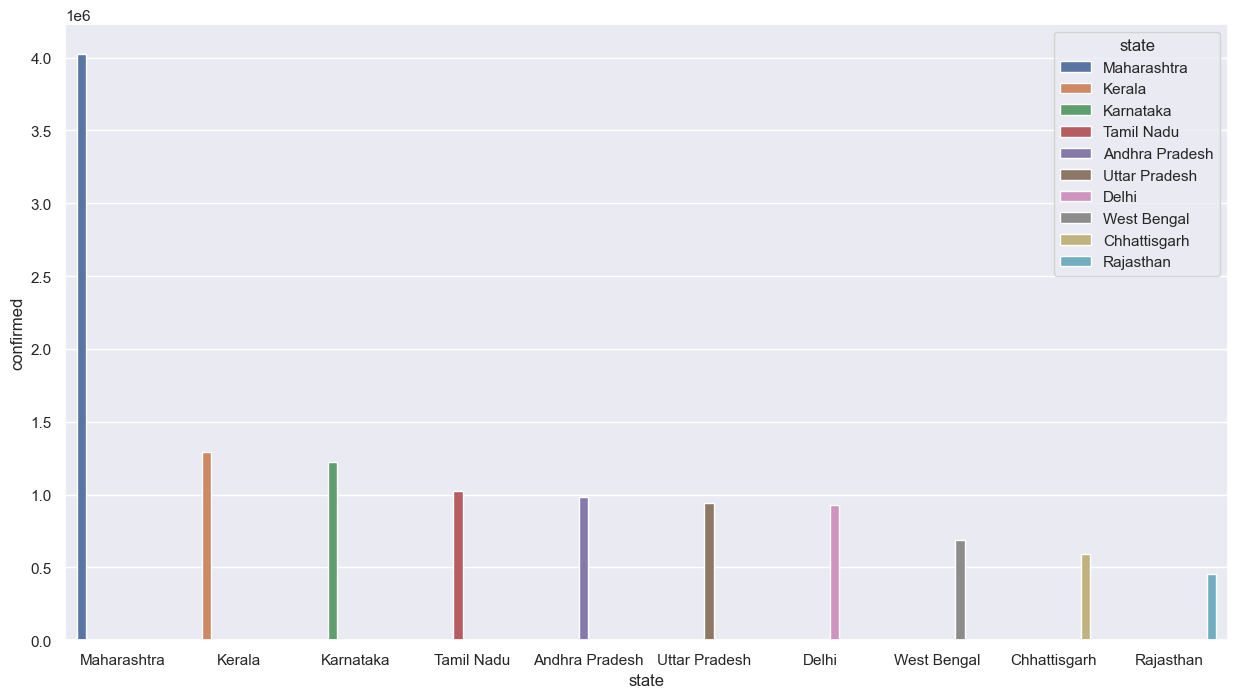

In [14]:
## nombre de cas par Etat en Inde

sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x="state",y="confirmed",data=top_states_confirmed,hue="state")
plt.show()

In [15]:
## Ensuite, on va faire la même chose, 
##+ mais pour les décès :
max_death_cases=today.sort_values(by='deaths',ascending=False)

In [16]:
max_death_cases.head()

,date,state,cured,deaths,confirmed
14098,2021-04-22,Maharashtra,3268449,61911,4027827
14093,2021-04-22,Karnataka,1032233,13762,1222202
14108,2021-04-22,Tamil Nadu,927440,13258,1025059
14086,2021-04-22,Delhi,831928,12887,930179
14113,2021-04-22,West Bengal,614750,10710,688956


In [17]:
top_states_death = max_death_cases[0:10]

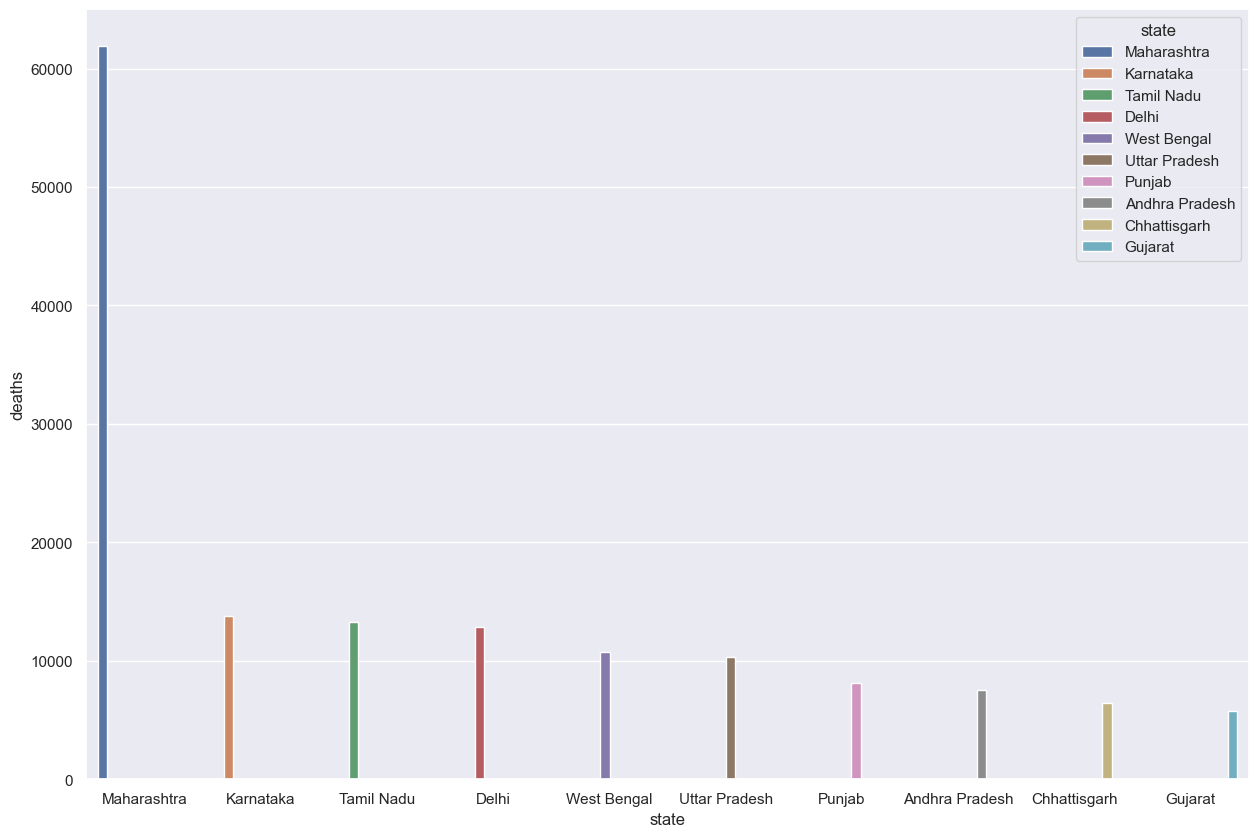

In [18]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",
            y="deaths",
            data=top_states_death,
            hue="state") ## Différencier par Etat
plt.show()

On peut voir que Maharashtra est l'Etat avec le plus de décès

In [19]:
## on recommence mais pour le nombre de personnes soignées

max_cured_cases=today.sort_values(by='cured',ascending=False)

In [20]:
max_cured_cases.head() ## Maharashtra est en tête

,date,state,cured,deaths,confirmed
14098,2021-04-22,Maharashtra,3268449,61911,4027827
14094,2021-04-22,Kerala,1154102,5000,1295059
14093,2021-04-22,Karnataka,1032233,13762,1222202
14108,2021-04-22,Tamil Nadu,927440,13258,1025059
14079,2021-04-22,Andhra Pradesh,918985,7510,986703


In [21]:
top_states_cured = max_cured_cases[0:5]

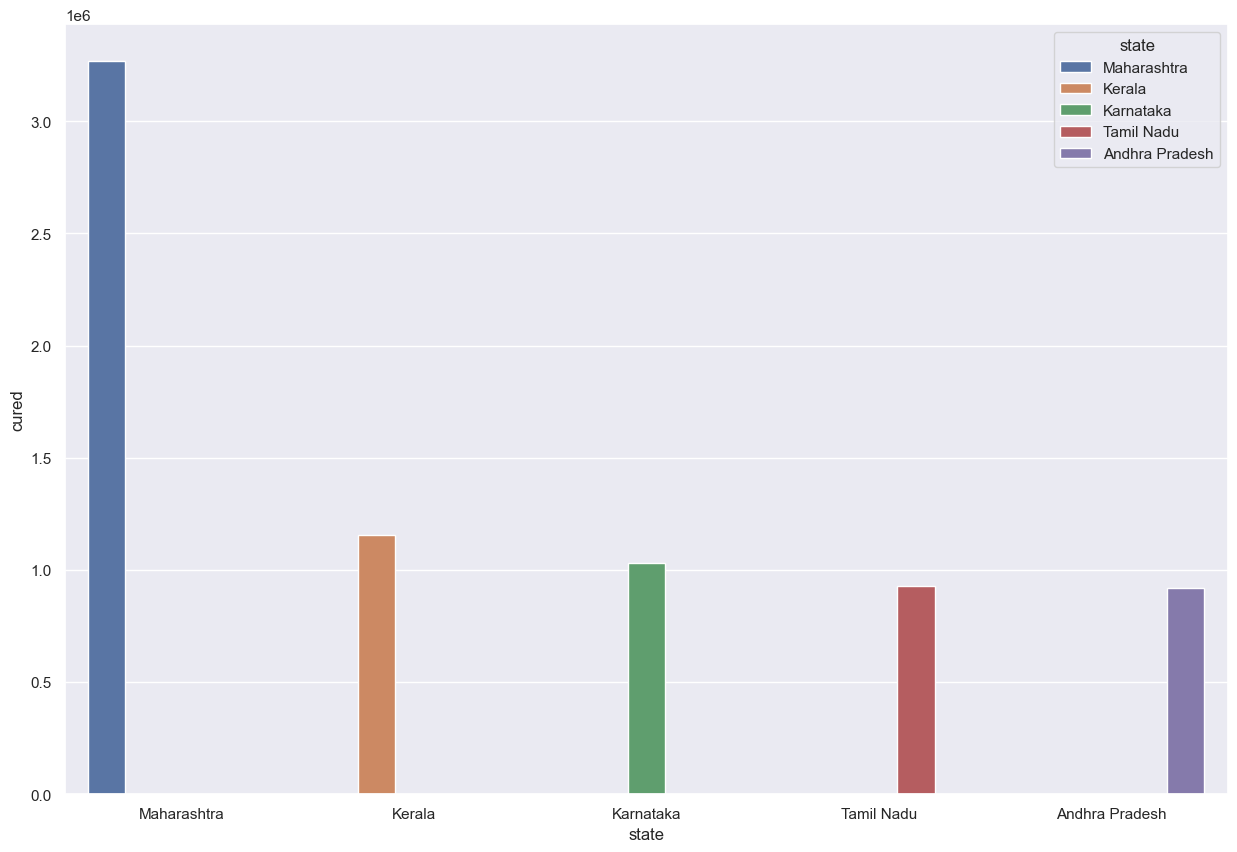

In [22]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="cured",data=top_states_cured,hue="state")
plt.show()

## Focus sur Maharashtra

On veut analyser chaque Etat.

In [23]:
maha = covid[covid.state=="Maharashtra"]

In [24]:
maha.shape ## attendu : (410, 5) 

(410, 5)

In [25]:
maha.head()

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14


In [26]:
maha.tail()

,date,state,cured,deaths,confirmed
13954,2021-04-18,Maharashtra,3061174,59970,3770707
13990,2021-04-19,Maharashtra,3106828,60473,3839338
14026,2021-04-20,Maharashtra,3159240,60824,3898262
14062,2021-04-21,Maharashtra,3213464,61343,3960359
14098,2021-04-22,Maharashtra,3268449,61911,4027827


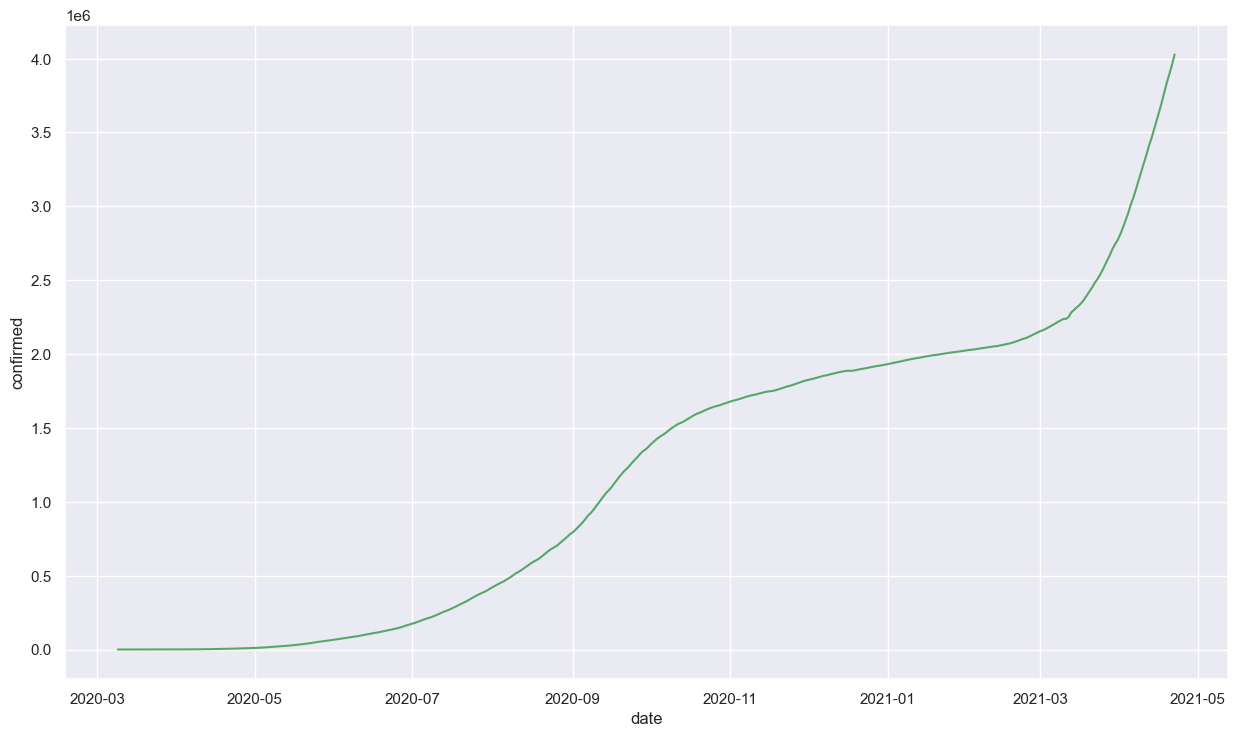

In [27]:
sns.set(rc={'figure.figsize':(15,8.5)})
sns.lineplot(x="date",y="confirmed",data=maha,color="g")
plt.show()

De mars à septembre, le nombre de cas augmente. Entre novembre et mars, on a une _flat curv_ puis en mars 2021, on a une augmentation.

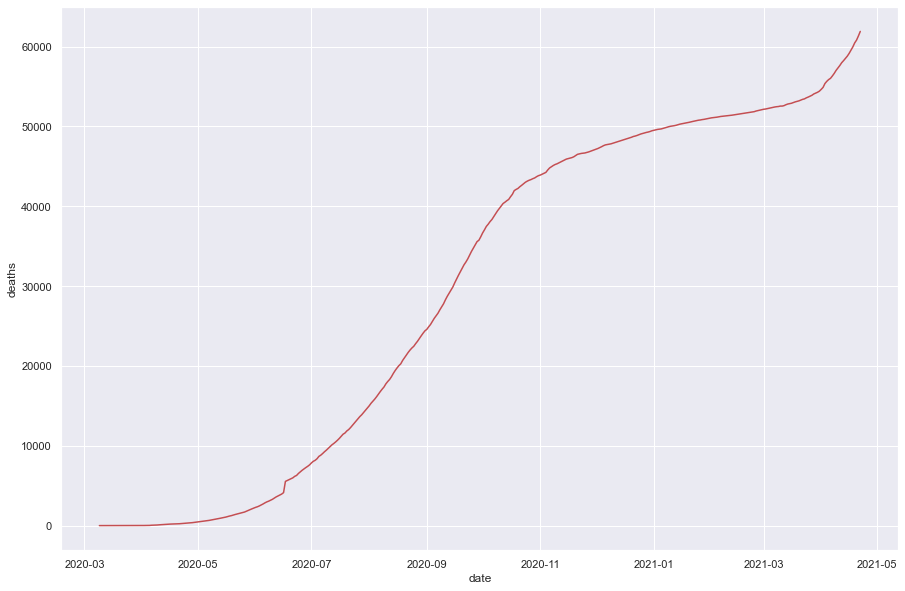

In [27]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data=maha,color="r")
plt.show()

## kerala

In [28]:
kerala = covid[covid.state=="Kerala"]

In [29]:
kerala.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [30]:
kerala.tail()

,date,state,cured,deaths,confirmed
13950,2021-04-18,Kerala,1135921,4904,1221167
13986,2021-04-19,Kerala,1140486,4929,1239424
14022,2021-04-20,Kerala,1144791,4950,1253068
14058,2021-04-21,Kerala,1148671,4978,1272645
14094,2021-04-22,Kerala,1154102,5000,1295059


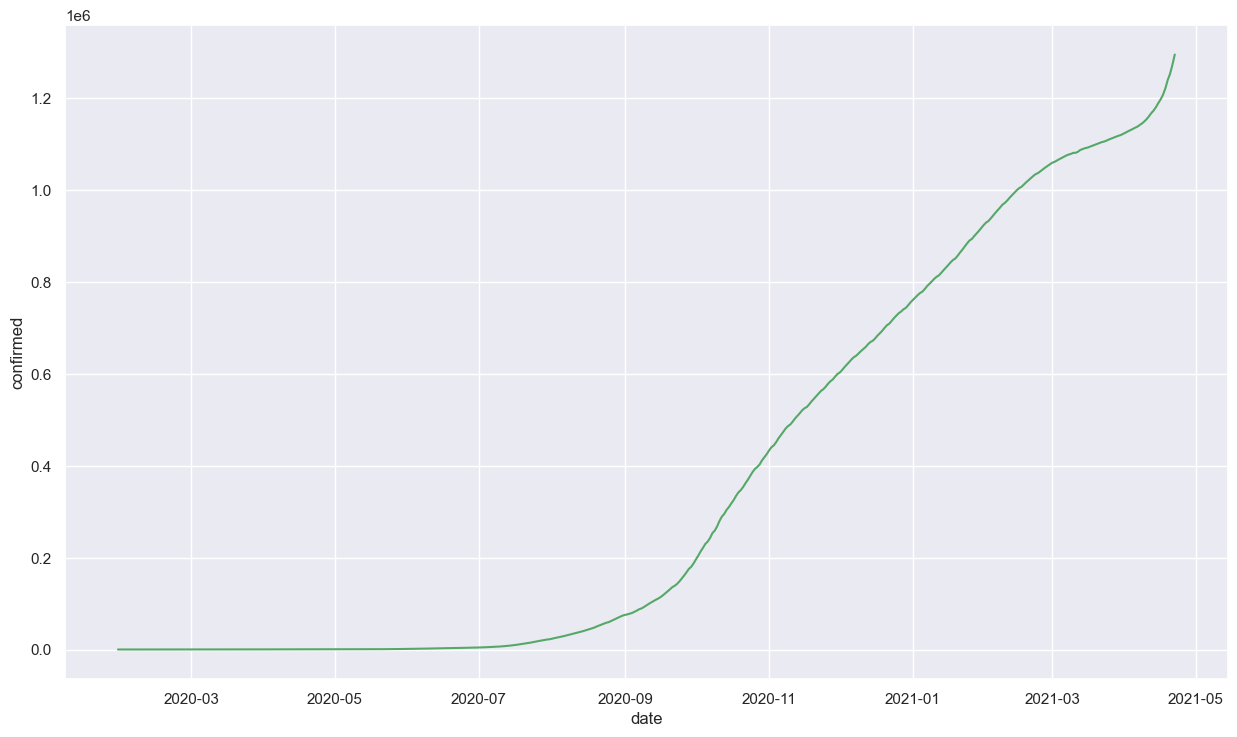

In [31]:
sns.set(rc={'figure.figsize':(15,8.5)})
sns.lineplot(x="date",y="confirmed",data=kerala,color="g")
plt.show()

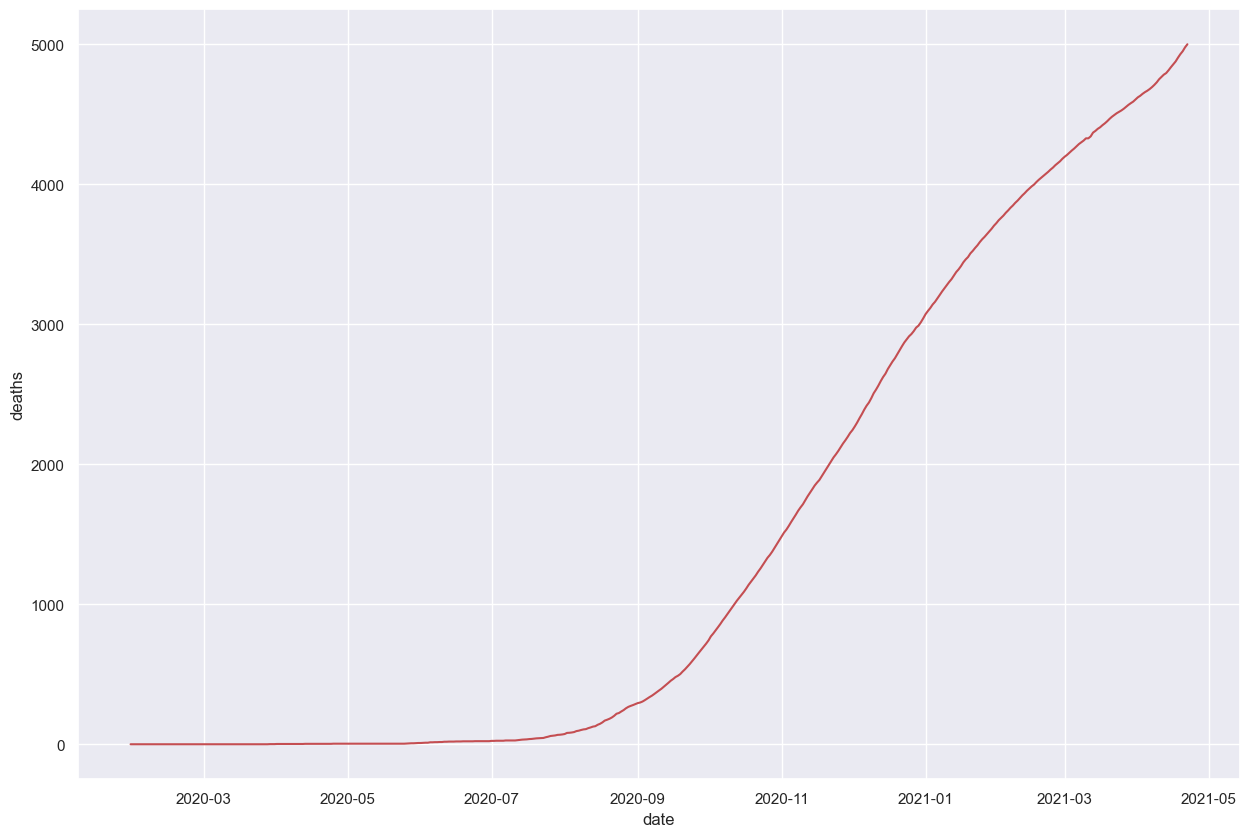

In [32]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data=kerala,color="r")
plt.show()

In [33]:
jk = covid[covid.state=="Jammu and Kashmir"]

In [34]:
jk.head()

,date,state,cured,deaths,confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1


In [35]:
jk.tail()

,date,state,cured,deaths,confirmed
13947,2021-04-18,Jammu and Kashmir,132205,2051,145166
13983,2021-04-19,Jammu and Kashmir,133168,2057,146692
14019,2021-04-20,Jammu and Kashmir,133981,2063,148208
14055,2021-04-21,Jammu and Kashmir,134697,2071,150238
14091,2021-04-22,Jammu and Kashmir,135430,2084,152442


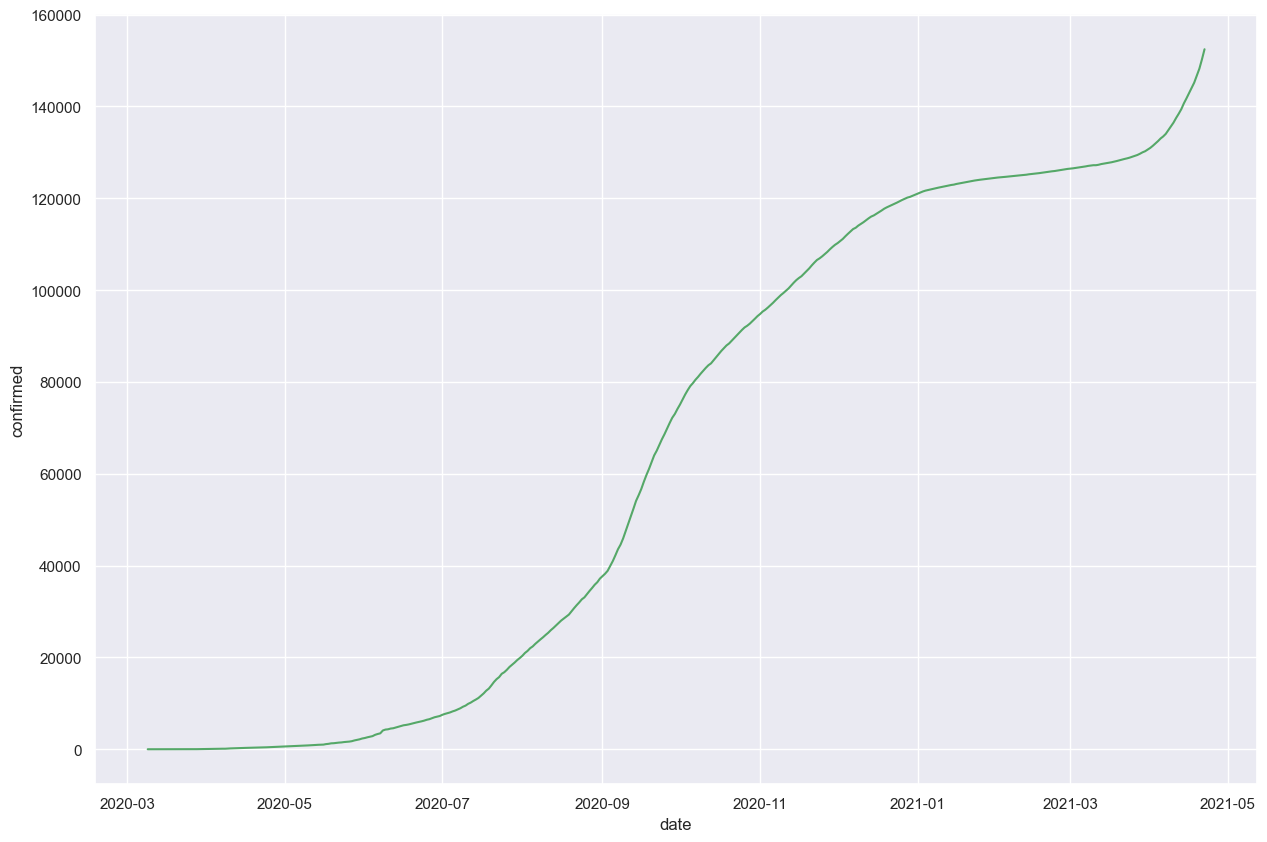

In [36]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=jk,color="g")
plt.show()

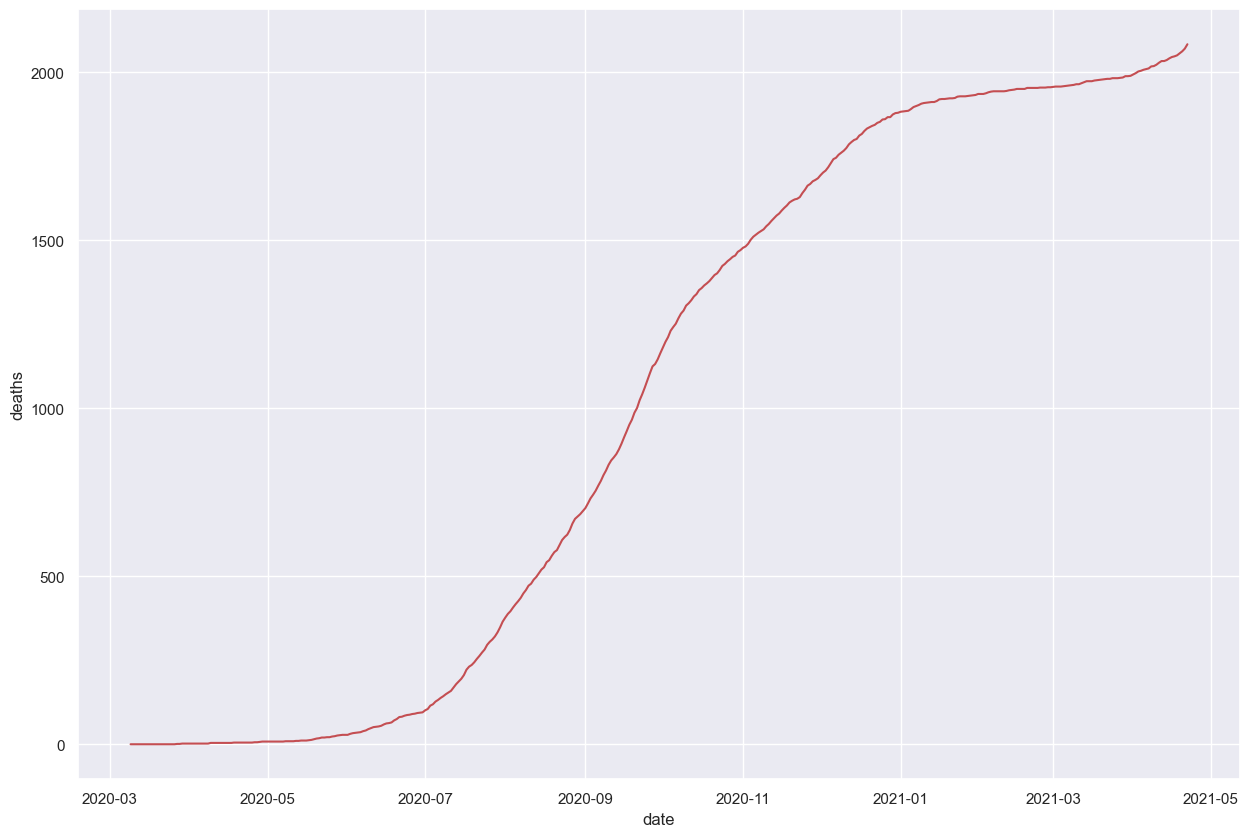

In [37]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data=jk,color="r")
plt.show()

## tests

In [40]:
tests = pd.read_csv('.\\DONNEES\\gre.csv')

In [41]:
tests.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
tests.tail()

,Date,State,TotalSamples,Negative,Positive
921,2020-05-06,West Bengal,30141.0,NaN,1456.0
922,2020-05-07,West Bengal,32752.0,NaN,1548.0
923,2020-05-08,West Bengal,35767.0,NaN,1678.0
924,2020-05-09,West Bengal,39368.0,NaN,1786.0
925,2020-05-10,West Bengal,43414.0,NaN,1939.0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
maha['date']=maha['date'].map(dt.datetime.toordinal) ## toordinal permet d'ordonner les valeurs

<ipython-input-42-595f711d6bae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['date']=maha['date'].map(dt.datetime.toordinal)


In [43]:
maha.head()

,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [44]:
x=maha['date']
y=maha['confirmed']

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rfr = RandomForestRegressor()

In [53]:
rfr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

<ipython-input-53-dbc7127a816c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))


RandomForestRegressor()

In [54]:
rfr.predict([[737498]])

array([16.55])